# Autoencoders using TensorFlow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('/Users/ilabuser/Desktop/Praveen/numerai_datasets/numerai_training_data.csv')

In [3]:
train_data = train_data.drop(['target'], 1)

In [4]:
print max(train_data.max(axis=1))
print min(train_data.min(axis=1))

1.0
0.0


In [31]:
from sklearn.preprocessing import normalize
train_data_norm = normalize(train_data, norm='l1', axis=1)

In [32]:
sum(train_data_norm[:,49:50])

array([ 2565.86264009])

In [33]:
pd.DataFrame(train_data_norm)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.016296,0.017888,0.015695,0.014747,0.015793,0.025885,0.016540,0.024532,0.011246,0.026325,...,0.025875,0.016128,0.016157,0.016743,0.022836,0.013386,0.032096,0.012241,0.025127,0.017249
1,0.013387,0.014233,0.018260,0.015620,0.016328,0.023278,0.015205,0.025699,0.020478,0.026405,...,0.014845,0.020287,0.024501,0.022450,0.018062,0.015597,0.030213,0.011520,0.014407,0.018199
2,0.023369,0.023052,0.022936,0.027313,0.014804,0.019657,0.014023,0.018306,0.023983,0.015997,...,0.026843,0.017695,0.018116,0.022256,0.016454,0.025023,0.020819,0.026855,0.020045,0.019340
3,0.023058,0.019657,0.018147,0.024813,0.011107,0.020585,0.009267,0.019314,0.020813,0.017311,...,0.029318,0.007626,0.022341,0.017951,0.018203,0.026571,0.028510,0.023265,0.019058,0.019525
4,0.020801,0.018595,0.023599,0.021326,0.014847,0.024397,0.021875,0.020064,0.019951,0.022565,...,0.022303,0.017718,0.025561,0.020578,0.016712,0.020373,0.025896,0.018424,0.017176,0.022338
5,0.018165,0.018412,0.023061,0.014784,0.023294,0.018388,0.020647,0.023393,0.019420,0.015202,...,0.016107,0.030114,0.018125,0.020552,0.025745,0.022610,0.016606,0.018103,0.025507,0.020632
6,0.022418,0.016453,0.013751,0.007476,0.008192,0.012701,0.022710,0.027766,0.012760,0.016570,...,0.016951,0.022588,0.021466,0.015288,0.023132,0.030186,0.025182,0.004737,0.027658,0.013351
7,0.018033,0.020972,0.016918,0.018970,0.015523,0.017803,0.015544,0.023142,0.019810,0.018209,...,0.021472,0.014182,0.020746,0.016917,0.021999,0.024184,0.027346,0.015292,0.023945,0.017714
8,0.019370,0.016663,0.028554,0.018328,0.017963,0.019703,0.021134,0.021017,0.022755,0.021223,...,0.020040,0.024605,0.022610,0.023177,0.020072,0.022434,0.016854,0.018024,0.017283,0.026988
9,0.009613,0.015999,0.032221,0.028683,0.023193,0.019970,0.013719,0.018964,0.029572,0.026343,...,0.024832,0.018068,0.031725,0.028525,0.013525,0.011336,0.018500,0.023954,0.011111,0.028923


In [7]:
corr = train_data.corr()

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

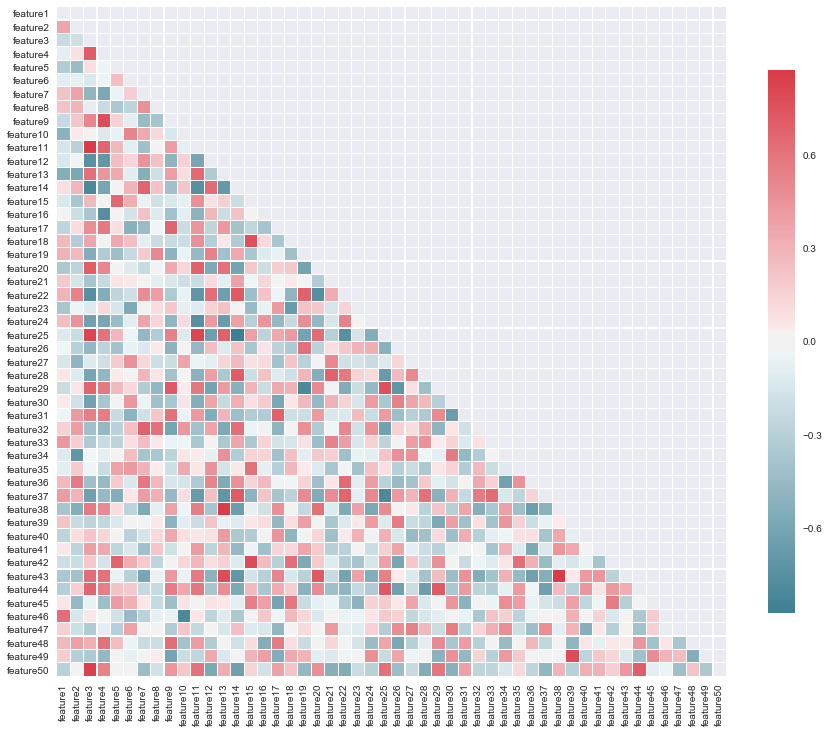

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# Creating feed forward neural network

In [10]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [11]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [12]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [13]:
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3"),
'decoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_3, n_hidden_2)), name="w_d_h1"),
'decoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_1)), name="w_d_h2"),
'decoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_input)),    name="w_d_h3")
}
biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [14]:
biases['encoder_b1'].dtype

tf.float64

In [15]:
#Add histogram summaries for weights

tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

<tf.Tensor 'w_d_h3_summ:0' shape=() dtype=string>

In [16]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [17]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [18]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [19]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [20]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [21]:
# Initializing the variables
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data_norm[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data_norm})

('Epoch:', '0001', 'cost=', '0.000000407')
('Epoch:', '0011', 'cost=', '0.000000029')
('Epoch:', '0021', 'cost=', '0.000000015')
('Epoch:', '0031', 'cost=', '0.000000010')
('Epoch:', '0041', 'cost=', '0.000000007')
('Epoch:', '0051', 'cost=', '0.000000006')
('Epoch:', '0061', 'cost=', '0.000000005')
('Epoch:', '0071', 'cost=', '0.000000004')
('Epoch:', '0081', 'cost=', '0.000000003')
('Epoch:', '0091', 'cost=', '0.000000003')
('Epoch:', '0101', 'cost=', '0.000000003')
('Epoch:', '0111', 'cost=', '0.000000002')
('Epoch:', '0121', 'cost=', '0.000000002')
('Epoch:', '0131', 'cost=', '0.000000002')
('Epoch:', '0141', 'cost=', '0.000000002')
('Epoch:', '0151', 'cost=', '0.000000002')
('Epoch:', '0161', 'cost=', '0.000000002')
('Epoch:', '0171', 'cost=', '0.000000002')
('Epoch:', '0181', 'cost=', '0.000000001')
('Epoch:', '0191', 'cost=', '0.000000001')
('Epoch:', '0201', 'cost=', '0.000000001')
('Epoch:', '0211', 'cost=', '0.000000001')
('Epoch:', '0221', 'cost=', '0.000000001')
('Epoch:', 

In [23]:
len(recon_ip)

136573

In [24]:
len(train_data.values)

136573

In [25]:
recon_ip_df = pd.DataFrame(recon_ip)
reduced_ip_df = pd.DataFrame(reduced_ip)

In [29]:
recon_ip_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
1,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
2,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
3,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
4,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
5,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
6,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
7,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
8,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
9,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038


In [27]:
pd.DataFrame(train_data_norm[0:4])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000006,0.000007,0.000006,0.000005,0.000006,0.000009,0.000006,0.000008,0.000004,0.000010,...,0.000009,0.000006,0.000006,0.000006,0.000008,0.000005,0.000011,0.000005,0.000009,0.000007
1,0.000005,0.000006,0.000007,0.000006,0.000007,0.000009,0.000006,0.000009,0.000007,0.000010,...,0.000005,0.000008,0.000010,0.000009,0.000007,0.000006,0.000011,0.000005,0.000006,0.000007
2,0.000009,0.000009,0.000009,0.000010,0.000006,0.000007,0.000006,0.000006,0.000008,0.000006,...,0.000009,0.000007,0.000007,0.000008,0.000006,0.000009,0.000007,0.000010,0.000008,0.000008
3,0.000009,0.000007,0.000007,0.000009,0.000004,0.000007,0.000004,0.000007,0.000007,0.000006,...,0.000010,0.000003,0.000008,0.000006,0.000007,0.000009,0.000009,0.000008,0.000007,0.000007


In [28]:
pd.DataFrame(reduced_ip)

,0,1,2,3,4
0,0.763345,0.792792,0.857391,0.739499,0.811936
1,0.763345,0.792792,0.857391,0.739499,0.811936
2,0.763345,0.792792,0.857391,0.739499,0.811936
3,0.763345,0.792792,0.857391,0.739499,0.811936
4,0.763345,0.792792,0.857391,0.739499,0.811936
5,0.763345,0.792792,0.857391,0.739499,0.811936
6,0.763345,0.792792,0.857391,0.739499,0.811936
7,0.763345,0.792792,0.857391,0.739499,0.811936
8,0.763345,0.792792,0.857391,0.739499,0.811936
9,0.763345,0.792792,0.857391,0.739499,0.811936


# PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [ ]:
pca = PCA(n_components=5)
pca_encomp = pca.fit_transform(train_data_norm)
pca_decomp = pca.inverse_transform(pca_encomp)
pca_recon_loss = mean_squared_error(train_data_norm, pca_decomp)
print "PCA Reconstruction loss: ", "{:.9f}".format(pca_recon_loss)

In [ ]:
"{:.9f}".format(np.mean(pow((train_data_norm - pca_decomp),2)))

In [ ]:
pow((train_data_norm - pca_decomp),2).shape

# KernelPCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=5,kernel="rbf", fit_inverse_transform=True, gamma=10)
#kpca_encomp = kpca.fit_transform(train_data)
#kpca_decomp = kpca.inverse_transform(kpca_encomp)
#recon_loss = mean_squared_error(train_data, kpca_decomp)
#print "KPCA Reconstruction loss: ", kpca_recon_loss

In [ ]:
kpca_encomp = kpca.fit_transform(train_data.values)

In [ ]:
import sklearn